In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df_netflix = pd.read_csv("netflix_titles.csv")
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [4]:
#drop unnecessary columns and fill in missing data
df_netflix.drop(columns=['show_id', 'date_added', 'country'], inplace = True)
df_netflix["director"].fillna("Not available", inplace = True)
df_netflix["cast"].fillna("Not available", inplace = True)
df_netflix

,type,title,director,cast,release_year,rating,duration,listed_in,description
0,TV Show,3%,Not available,"João Miguel, Bianca Comparato, Michel Gomes, R...",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,Movie,Zulu Man in Japan,Not available,Nasty C,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,TV Show,Zumbo's Just Desserts,Not available,"Adriano Zumbo, Rachel Khoo",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [5]:
#create new dataframe to only show tv shows and drop additional columns not needed
df_shows = df_netflix[df_netflix['type'] == 'TV Show'].reset_index()
df_shows = df_shows.drop(['index', 'type', 'rating', 'duration', 'release_year'], axis=1)

df_shows

,title,director,cast,listed_in,description
0,3%,Not available,"João Miguel, Bianca Comparato, Michel Gomes, R...","International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...","International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
2,1983,Not available,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
3,1994,Diego Enrique Osorno,Not available,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
4,Feb-09,Not available,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...","International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...
2405,Zindagi Gulzar Hai,Not available,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...","International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
2406,Zoids Wild,Not available,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...","Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
2407,Zombie Dumb,Not available,Not available,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
2408,Zona Rosa,Not available,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...","International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


In [6]:
df_shows[df_shows['director'].str.contains('Not available')]

,title,director,cast,listed_in,description
0,3%,Not available,"João Miguel, Bianca Comparato, Michel Gomes, R...","International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
2,1983,Not available,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
4,Feb-09,Not available,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...","International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
5,​SAINT SEIYA: Knights of the Zodiac,Not available,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...","Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...
6,(Un)Well,Not available,Not available,Reality TV,This docuseries takes a deep dive into the luc...
...,...,...,...,...,...
2405,Zindagi Gulzar Hai,Not available,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...","International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
2406,Zoids Wild,Not available,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...","Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
2407,Zombie Dumb,Not available,Not available,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
2408,Zona Rosa,Not available,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...","International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


In [7]:
#drop directors column for the count vector because it would be a similarity even if the shows aren't similar
df_shows = df_shows.drop(['director'], axis=1)
df_shows

,title,cast,listed_in,description
0,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...","International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,46,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...","International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
2,1983,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
3,1994,Not available,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
4,Feb-09,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...","International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...
2405,Zindagi Gulzar Hai,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...","International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
2406,Zoids Wild,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...","Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
2407,Zombie Dumb,Not available,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
2408,Zona Rosa,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...","International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


In [8]:
#removed spaces inbetween cast column
df_shows['cast'] = df_shows['cast'].str.replace(" ","")
df_shows

,title,cast,listed_in,description
0,3%,"JoãoMiguel,BiancaComparato,MichelGomes,Rodolfo...","International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,46,"ErdalBeşikçioğlu,YaseminAllen,MelisBirkan,Sayg...","International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
2,1983,"RobertWięckiewicz,MaciejMusiał,MichalinaOlszań...","Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
3,1994,Notavailable,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
4,Feb-09,"ShahdElYaseen,ShailaSabt,Hala,HanadiAl-Kandari...","International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...
2405,Zindagi Gulzar Hai,"SanamSaeed,FawadKhan,AyeshaOmer,MehreenRaheel,...","International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
2406,Zoids Wild,"KenshoOno,TakahiroSakurai,MikakoKomatsu,Etsuko...","Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
2407,Zombie Dumb,Notavailable,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
2408,Zona Rosa,"ManuNNa,AnaJuliaYeyé,RayContreras,PabloMorán","International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


In [9]:
#combined all columns into a new column for keywords that will be vectorized
df_shows['text'] = df_shows[df_shows.columns[1:]].apply(lambda x: ', '.join(x.dropna().astype(str).str.lower()), axis=1)
df_shows

,title,cast,listed_in,description,text
0,3%,"JoãoMiguel,BiancaComparato,MichelGomes,Rodolfo...","International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"joãomiguel,biancacomparato,michelgomes,rodolfo..."
1,46,"ErdalBeşikçioğlu,YaseminAllen,MelisBirkan,Sayg...","International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,"erdalbeşikçioğlu,yaseminallen,melisbirkan,sayg..."
2,1983,"RobertWięckiewicz,MaciejMusiał,MichalinaOlszań...","Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...","robertwięckiewicz,maciejmusiał,michalinaolszań..."
3,1994,Notavailable,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,"notavailable, crime tv shows, docuseries, inte..."
4,Feb-09,"ShahdElYaseen,ShailaSabt,Hala,HanadiAl-Kandari...","International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...","shahdelyaseen,shailasabt,hala,hanadial-kandari..."
...,...,...,...,...,...
2405,Zindagi Gulzar Hai,"SanamSaeed,FawadKhan,AyeshaOmer,MehreenRaheel,...","International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...","sanamsaeed,fawadkhan,ayeshaomer,mehreenraheel,..."
2406,Zoids Wild,"KenshoOno,TakahiroSakurai,MikakoKomatsu,Etsuko...","Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,"kenshoono,takahirosakurai,mikakokomatsu,etsuko..."
2407,Zombie Dumb,Notavailable,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...","notavailable, kids' tv, korean tv shows, tv co..."
2408,Zona Rosa,"ManuNNa,AnaJuliaYeyé,RayContreras,PabloMorán","International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,"manunna,anajuliayeyé,raycontreras,pablomorán, ..."


In [10]:
vect_count = CountVectorizer()

#creating matrix counting each word in text column
count_matrix = vect_count.fit_transform(df_shows['text'])

# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

def show_recommendations(title, cosine_sim = cosine_sim):

    # initializing empty list
    shows_rec = []
    
    #finding index of movie that matches the title
    idx = df_shows.loc[df_shows['title'] == title].index[0]
    print('idx is ', idx)
    
    #creating Series with the similarity scores in descending order
    scores = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    print(scores)
    
    # finding the top 5 indexes that are similar to movie
    top_50_index = list(scores.iloc[1:51].index)
    
    # populating the list with the titles of the best 10 matching movies
    for x in top_50_index:
        shows_rec.append(list(df_shows.title)[x])
        
    return shows_rec

In [11]:
#create new dataframe to only show movies and drop additional columns not needed
df_movies = df_netflix[df_netflix['type'] == 'Movie'].reset_index()
df_movies = df_movies.drop(['index', 'type', 'rating', 'duration', 'release_year'], axis=1)
df_movies

,title,director,cast,listed_in,description
0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
1,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
2,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...","Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
3,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Dramas,A brilliant group of students become card-coun...
4,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...","Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...
5372,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
5373,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
5374,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...","Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
5375,Zulu Man in Japan,Not available,Nasty C,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [12]:
#removed spaces inbetween director and cast columns
df_movies['director'] = df_movies['director'].str.replace(" ","")
df_movies['cast'] = df_movies['cast'].str.replace(" ","")
df_movies

,title,director,cast,listed_in,description
0,7:19,JorgeMichelGrau,"DemiánBichir,HéctorBonilla,OscarSerrano,Azalia...","Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
1,23:59,GilbertChan,"TeddChan,StellaChung,HenleyHii,LawrenceKoh,Tom...","Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
2,9,ShaneAcker,"ElijahWood,JohnC.Reilly,JenniferConnelly,Chris...","Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
3,21,RobertLuketic,"JimSturgess,KevinSpacey,KateBosworth,AaronYoo,...",Dramas,A brilliant group of students become card-coun...
4,122,YasirAlYasiri,"AminaKhalil,AhmedDawood,TarekLotfy,AhmedElFish...","Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...
5372,Zoom,PeterHewitt,"TimAllen,CourteneyCox,ChevyChase,KateMara,Ryan...","Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
5373,Zozo,JosefFares,"ImadCreidi,AntoinetteTurk,EliasGergi,CarmenLeb...","Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
5374,Zubaan,MozezSingh,"VickyKaushal,Sarah-JaneDias,RaaghavChanana,Man...","Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
5375,Zulu Man in Japan,Notavailable,NastyC,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [13]:
#combined all columns into a new column for keywords that will be vectorized
df_movies['text'] = df_movies[df_movies.columns[1:]].apply(lambda x: ', '.join(x.dropna().astype(str).str.lower()), axis=1)
df_movies

,title,director,cast,listed_in,description,text
0,7:19,JorgeMichelGrau,"DemiánBichir,HéctorBonilla,OscarSerrano,Azalia...","Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"jorgemichelgrau, demiánbichir,héctorbonilla,os..."
1,23:59,GilbertChan,"TeddChan,StellaChung,HenleyHii,LawrenceKoh,Tom...","Horror Movies, International Movies","When an army recruit is found dead, his fellow...","gilbertchan, teddchan,stellachung,henleyhii,la..."
2,9,ShaneAcker,"ElijahWood,JohnC.Reilly,JenniferConnelly,Chris...","Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","shaneacker, elijahwood,johnc.reilly,jenniferco..."
3,21,RobertLuketic,"JimSturgess,KevinSpacey,KateBosworth,AaronYoo,...",Dramas,A brilliant group of students become card-coun...,"robertluketic, jimsturgess,kevinspacey,katebos..."
4,122,YasirAlYasiri,"AminaKhalil,AhmedDawood,TarekLotfy,AhmedElFish...","Horror Movies, International Movies","After an awful accident, a couple admitted to ...","yasiralyasiri, aminakhalil,ahmeddawood,tareklo..."
...,...,...,...,...,...,...
5372,Zoom,PeterHewitt,"TimAllen,CourteneyCox,ChevyChase,KateMara,Ryan...","Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","peterhewitt, timallen,courteneycox,chevychase,..."
5373,Zozo,JosefFares,"ImadCreidi,AntoinetteTurk,EliasGergi,CarmenLeb...","Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,"joseffares, imadcreidi,antoinetteturk,eliasger..."
5374,Zubaan,MozezSingh,"VickyKaushal,Sarah-JaneDias,RaaghavChanana,Man...","Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"mozezsingh, vickykaushal,sarah-janedias,raagha..."
5375,Zulu Man in Japan,Notavailable,NastyC,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...","notavailable, nastyc, documentaries, internati..."


In [14]:
vect_count = CountVectorizer()

#creating matrix counting each word in text column
count_matrix = vect_count.fit_transform(df_movies['text'])

# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

def movie_recommendations(title, cosine_sim = cosine_sim):

    # initializing empty list
    movie_rec = []
    
    #finding index of movie that matches the title
    idx = df_movies.loc[df_movies['title'] == title].index[0]
    print('idx is ', idx)
    
    #creating Series with the similarity scores in descending order
    scores = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    print(scores)
    
    # finding the top 5 indexes that are similar to movie
    top_50_index = list(scores.iloc[1:51].index)
    
    # populating the list with the titles of the best 10 matching movies
    for x in top_50_index:
        movie_rec.append(list(df_movies.title)[x])
        
    return movie_rec

In [15]:
m = input("Enter a movie title: ")
#putting list into dataframe & rename column
df_movie_rec = pd.DataFrame(movie_recommendations(m), columns=['Movie Titles'])
#shift index by 1
df_movie_rec.index += 1
#print(movie_recommendations("13TH"))
df_movie_rec

Enter a movie title: 13TH
idx is  50
50      1.000000
4558    0.572656
4075    0.561747
5226    0.533863
4783    0.518875
          ...   
5088    0.000000
2503    0.000000
2493    0.000000
2488    0.000000
2410    0.000000
Length: 5377, dtype: float64


,Movie Titles
1,The Legend of 420
2,Studio 54
3,What the Health
4,The Speed Cubers
5,The Hurt Business
6,Food on the Go
7,Zulu Man in Japan
8,The Force
9,Muzaffarnagar Baaqi Hai
10,Whose Streets?


In [16]:
y = input("Enter a show title: ")
#putting list into dataframe & rename column
df_show_rec = pd.DataFrame(show_recommendations(y), columns=['TV Show Titles'])
#shift index by 1
df_show_rec.index += 1
df_show_rec

Enter a show title: 46
idx is  1
1       1.000000
203     0.435801
385     0.392139
809     0.386654
870     0.386463
          ...   
192     0.000000
1105    0.000000
1120    0.000000
121     0.000000
658     0.000000
Length: 2410, dtype: float64


,TV Show Titles
1,Behzat Ç.
2,Cinta Iris
3,Heart & Soul
4,How to Live Mortgage Free with Sarah Beeny
5,Secret City
6,Argon
7,Someone Like You
8,Dracula
9,I Hear You
10,My Husband Won't Fit


In [17]:
import matplotlib.pyplot as plt

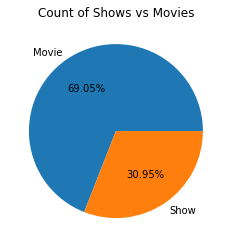

In [18]:
#comparing percentage of shows to movies
movie_count = df_movies['title'].count()
show_count = df_shows['title'].count()
x = ['Movie', 'Show']
y = [movie_count, show_count]
plt.pie(y, labels=x, autopct='%.2f%%')
plt.title("Count of Shows vs Movies")
plt.show()
#avg_rating = [avg_english_rating, avg_bengali_rating, avg_hindi_rating, avg_tamil_rating, avg_telugu_rating]
#avg_language = ["English", "Bengali", "Hindi", "Tamil", "Telugu"]

#plt.bar(avg_language, avg_rating, color=['yellow', 'red', 'green', 'blue', 'cyan'])
#plt.xlabel("Language")
#plt.ylabel("IMDB Rating")
#plt.title("Average Rating For Each Language")

#plt.show()

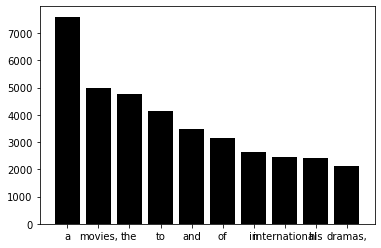

In [189]:
movie_textcount = pd.Series(','.join(df_movies['text']).split()).value_counts()[:10]
movie_textlist = movie_textcount.index.tolist()
movie_list = str(movie_textlist).replace(',','')

#Show the top 10 words in consolidated column for Movies
plt.bar(movie_textlist, movie_textcount, color="black")
plt.show()


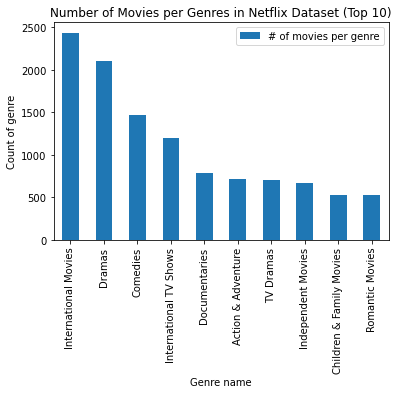

In [186]:
df_genre = pd.DataFrame(df_netflix['listed_in'])
genre_count = df_genre.listed_in.str.split(', ',expand=True).stack().value_counts()
final_genre = pd.DataFrame(genre_count, columns=['# of genre'])
top_10_genre = pd.DataFrame(genre_count[:10], columns=['# of movies per genre'])
top_10_genre.plot(kind='bar')
plt.xlabel("Genre name")
plt.ylabel("Count of genre")
plt.title("Number of Movies per Genres in Netflix Dataset (Top 10)")
plt.show()
